<a href="https://colab.research.google.com/github/Jaeeyun/cv_midterm_assignment/blob/main/CV_mid_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN

2021111633 박재윤


In [1]:
import numpy as np

from tensorflow.keras.datasets import cifar10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt

# CIFAR-10 데이터 불러오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


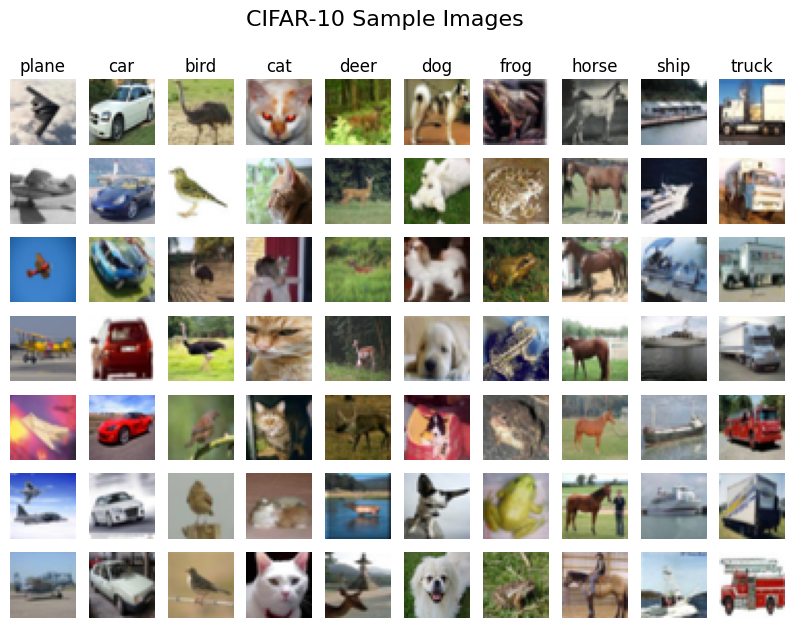

In [2]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7 # 각 클래스당 시각화할 샘플 수

plt.figure(figsize=(num_classes * 1.0, samples_per_class * 1.0)) # 플롯 전체 크기 설정

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)

    idxs = np.random.choice(idxs, samples_per_class, replace=False)

    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')

        if i == 0:
            plt.title(cls)

plt.suptitle("CIFAR-10 Sample Images", fontsize=16)
plt.show()

## Train / Test

In [3]:
# 벡터화
x_train_flatten = x_train.reshape(len(x_train), -1)
x_test_flatten = x_test.reshape(len(x_test), -1)
y_train_flatten = y_train.reshape(-1,)
y_test_flatten = y_test.reshape(-1,)

# 표준화
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flatten)
x_test_scaled = scaler.transform(x_test_flatten)

# PCA 차원 축소
pca = PCA(n_components=350, whiten=True)  # whiten 추가 → 성능/안정성 향상
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$

Precision = $\frac{TP}{TP + FP}$

Recall = $\frac{TP}{TP + FN}$

F1-score = $2 \times \frac{Precision \times Recall}{Precision + Recall}$

In [4]:
# 사용할 k 값 목록
k_values = [1, 2, 4, 8, 16, 32, 64, 128, 256, 516, 1024, 2048]

# 결과 저장용 리스트
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

In [5]:
# 각 k값에 대해 학습 및 평가 반복
for k in k_values:
    print(f"k = {k}")
    # KNN 분류기 선언
    knn = KNeighborsClassifier(
        n_neighbors=k,
        metric='cosine',
        weights='distance'
    )

    knn.fit(x_train_pca, y_train_flatten)
    y_pred = knn.predict(x_test_pca)

    # 지표 계산 (다중 클래스이므로 average='macro')
    acc = accuracy_score(y_test_flatten, y_pred)
    prec = precision_score(y_test_flatten, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test_flatten, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test_flatten, y_pred, average='macro', zero_division=0)

    # 리스트에 저장
    accuracy_list.append(acc)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)

    print(f"  Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")

k = 1
  Accuracy=0.4369, Precision=0.4399, Recall=0.4369, F1=0.4334
k = 2
  Accuracy=0.4369, Precision=0.4399, Recall=0.4369, F1=0.4334
k = 4
  Accuracy=0.4776, Precision=0.4804, Recall=0.4776, F1=0.4729
k = 8
  Accuracy=0.5094, Precision=0.5144, Recall=0.5094, F1=0.5051
k = 16
  Accuracy=0.5269, Precision=0.5344, Recall=0.5269, F1=0.5231
k = 32
  Accuracy=0.5428, Precision=0.5506, Recall=0.5428, F1=0.5389
k = 64
  Accuracy=0.5565, Precision=0.5650, Recall=0.5565, F1=0.5530
k = 128
  Accuracy=0.5650, Precision=0.5736, Recall=0.5650, F1=0.5621
k = 256
  Accuracy=0.5678, Precision=0.5758, Recall=0.5678, F1=0.5643
k = 516
  Accuracy=0.5682, Precision=0.5755, Recall=0.5682, F1=0.5650
k = 1024
  Accuracy=0.5547, Precision=0.5601, Recall=0.5547, F1=0.5504
k = 2048
  Accuracy=0.5478, Precision=0.5513, Recall=0.5478, F1=0.5424


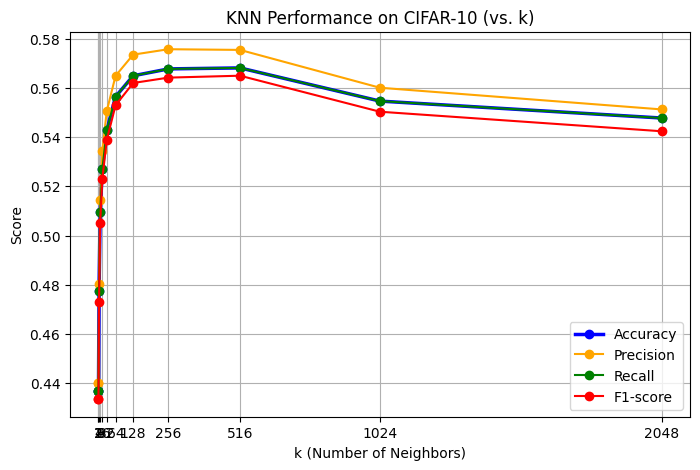

In [6]:
# 성능 시각화
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_list, marker='o', color='blue', linewidth=2.5, label='Accuracy')
plt.plot(k_values, precision_list, marker='o', color='orange', label='Precision')
plt.plot(k_values, recall_list, marker='o', color='green', label='Recall')
plt.plot(k_values, f1_list, marker='o', color='red', label='F1-score')
plt.title("KNN Performance on CIFAR-10 (vs. k)")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Score")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

## 한계점: validation이 없기 때문에 test에 fit된 결과를 best k라고 결정할 수 밖에 없다.

## Train / Validation / Test

In [7]:
# 사용할 k 값 목록
k_values = [1, 2, 4, 8, 16, 32, 64, 128, 256, 516, 1024, 2048]

# 결과 저장용 리스트
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

In [8]:
# 벡터화
x_train_flatten = x_train.reshape(len(x_train), -1)
x_test_flatten = x_test.reshape(len(x_test), -1)
y_train_flatten = y_train.reshape(-1,)
y_test_flatten = y_test.reshape(-1,)

# Train을 다시 Train(80%) + Validation(20%)으로 분리
x_train_sub, x_val, y_train_sub, y_val = train_test_split(
    x_train_flatten, y_train_flatten, test_size=0.2, random_state=42, stratify=y_train_flatten
)

In [9]:
# Train 데이터로만 Scaler + PCA fit
scaler = StandardScaler()
x_train_sub_scaled = scaler.fit_transform(x_train_sub)

pca = PCA(n_components=350, whiten=True)
x_train_sub_pca = pca.fit_transform(x_train_sub_scaled)

# Validation과 Test는 transform만 수행
x_val_scaled = scaler.transform(x_val)
x_val_pca    = pca.transform(x_val_scaled)

x_test_scaled = scaler.transform(x_test_flatten)
x_test_pca    = pca.transform(x_test_scaled)

# knn 학습
for k in k_values:
    print(f"k = {k}")
    # KNN 분류기 선언
    knn = KNeighborsClassifier(
        n_neighbors=k,
        metric='cosine',
        weights='distance'
    )

    knn.fit(x_train_sub_pca, y_train_sub)  # train_sub으로 학습
    y_pred_val = knn.predict(x_val_pca)    # validation으로 평가

    # 지표 계산 (다중 클래스이므로 average='macro')
    acc = accuracy_score(y_val, y_pred_val)
    prec = precision_score(y_val, y_pred_val, average='macro', zero_division=0)
    rec = recall_score(y_val, y_pred_val, average='macro', zero_division=0)
    f1 = f1_score(y_val, y_pred_val, average='macro', zero_division=0)

    accuracy_list.append(acc)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)

    print(f"  Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")

k = 1
  Accuracy=0.4301, Precision=0.4324, Recall=0.4301, F1=0.4269
k = 2
  Accuracy=0.4301, Precision=0.4324, Recall=0.4301, F1=0.4269
k = 4
  Accuracy=0.4657, Precision=0.4677, Recall=0.4657, F1=0.4612
k = 8
  Accuracy=0.4947, Precision=0.4999, Recall=0.4947, F1=0.4906
k = 16
  Accuracy=0.5174, Precision=0.5259, Recall=0.5174, F1=0.5140
k = 32
  Accuracy=0.5329, Precision=0.5414, Recall=0.5329, F1=0.5297
k = 64
  Accuracy=0.5423, Precision=0.5503, Recall=0.5423, F1=0.5392
k = 128
  Accuracy=0.5503, Precision=0.5584, Recall=0.5503, F1=0.5472
k = 256
  Accuracy=0.5561, Precision=0.5640, Recall=0.5561, F1=0.5534
k = 516
  Accuracy=0.5515, Precision=0.5588, Recall=0.5515, F1=0.5485
k = 1024
  Accuracy=0.5459, Precision=0.5515, Recall=0.5459, F1=0.5420
k = 2048
  Accuracy=0.5385, Precision=0.5426, Recall=0.5385, F1=0.5340


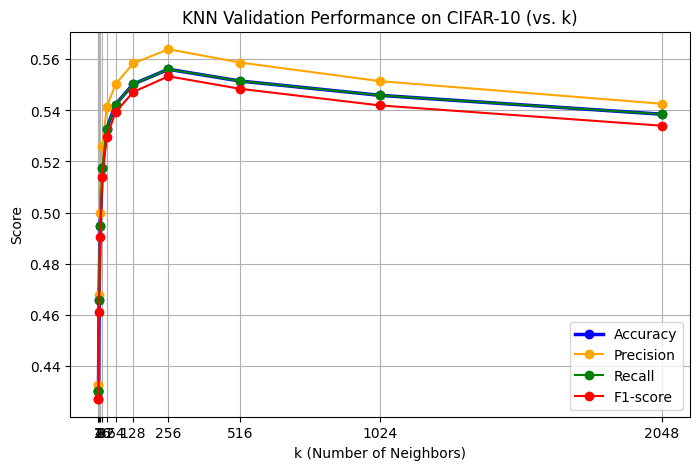

In [10]:
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_list, marker='o', color='blue', linewidth=2.5, label='Accuracy')
plt.plot(k_values, precision_list, marker='o', color='orange', label='Precision')
plt.plot(k_values, recall_list, marker='o', color='green', label='Recall')
plt.plot(k_values, f1_list, marker='o', color='red', label='F1-score')
plt.title("KNN Validation Performance on CIFAR-10 (vs. k)")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Score")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# 벡터화
x_train_flatten = x_train.reshape(len(x_train), -1)
x_test_flatten = x_test.reshape(len(x_test), -1)
y_train_flatten = y_train.reshape(-1,)
y_test_flatten = y_test.reshape(-1,)

# 표준화
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flatten)
x_test_scaled = scaler.transform(x_test_flatten)

# PCA 차원 축소
pca = PCA(n_components=350, whiten=True)  # whiten 추가 → 성능/안정성 향상
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# best k (accuracy, f1 score 기준)
best_k = 256

# best k로 train 전체(=train + validation) 다시 학습
knn_best = KNeighborsClassifier(
  n_neighbors=best_k,
  metric='cosine',
  weights='distance'
)
knn_best.fit(x_train_pca, y_train_flatten)

# test set으로 최종 평가
y_pred = knn_best.predict(x_test_pca)

acc_test = accuracy_score(y_test_flatten, y_pred)
prec_test = precision_score(y_test_flatten, y_pred, average='macro', zero_division=0)
rec_test = recall_score(y_test_flatten, y_pred, average='macro', zero_division=0)
f1_test = f1_score(y_test_flatten, y_pred, average='macro', zero_division=0)

print("Final Test Performance (using best k)")
print(f"Accuracy={acc_test:.4f}, Precision={prec_test:.4f}, Recall={rec_test:.4f}, F1={f1_test:.4f}")

Final Test Performance (using best k)
Accuracy=0.5651, Precision=0.5733, Recall=0.5651, F1=0.5619


## 5-fold cross-validation

In [12]:
from sklearn.model_selection import KFold
from tqdm import tqdm

In [13]:
k_values = k_values = [1, 2, 4, 8, 16, 32, 64, 128, 256, 516, 1024, 2048]
results = {k: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []} for k in k_values}

In [17]:
# 5-fold 교차검증
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 벡터화
x_train_flatten = x_train.reshape(len(x_train), -1)
x_test_flatten = x_test.reshape(len(x_test), -1)
y_train_flatten = y_train.reshape(-1,)
y_test_flatten = y_test.reshape(-1,)

for k in k_values:
    print(f"\nEvaluating k={k}")

    for train_idx, val_idx in tqdm(kf.split(x_train_flatten), total=5, desc="5-Fold CV"):
        x_train_fold_raw, x_val_fold_raw = x_train_flatten[train_idx], x_train_flatten[val_idx]
        y_train_fold, y_val_fold = y_train_flatten[train_idx], y_train_flatten[val_idx]

        # StandardScaler + PCA (fold별 fit)
        scaler = StandardScaler()
        x_train_fold_scaled = scaler.fit_transform(x_train_fold_raw)
        x_val_fold_scaled = scaler.transform(x_val_fold_raw)

        pca = PCA(n_components=350, whiten=True)
        x_train_fold_pca = pca.fit_transform(x_train_fold_scaled)
        x_val_fold_pca = pca.transform(x_val_fold_scaled)

        # knn
        knn_clf = KNeighborsClassifier(
          n_neighbors=k,
          metric='cosine',
          weights='distance'
        )
        knn_clf.fit(x_train_fold_pca, y_train_fold)
        y_val_pred  = knn_clf.predict(x_val_fold_pca)

        # 지표 계산
        results[k]['accuracy'].append(accuracy_score(y_val_fold, y_val_pred))
        results[k]['precision'].append(precision_score(y_val_fold, y_val_pred, average='macro', zero_division=0))
        results[k]['recall'].append(recall_score(y_val_fold, y_val_pred, average='macro', zero_division=0))
        results[k]['f1'].append(f1_score(y_val_fold, y_val_pred, average='macro', zero_division=0))



Evaluating k=1


5-Fold CV: 100%|██████████| 5/5 [05:14<00:00, 62.81s/it]



Evaluating k=2


5-Fold CV: 100%|██████████| 5/5 [05:23<00:00, 64.78s/it]



Evaluating k=4


5-Fold CV: 100%|██████████| 5/5 [05:04<00:00, 60.86s/it]



Evaluating k=8


5-Fold CV: 100%|██████████| 5/5 [05:07<00:00, 61.43s/it]



Evaluating k=16


5-Fold CV: 100%|██████████| 5/5 [05:02<00:00, 60.49s/it]



Evaluating k=32


5-Fold CV: 100%|██████████| 5/5 [05:03<00:00, 60.67s/it]



Evaluating k=64


5-Fold CV: 100%|██████████| 5/5 [05:06<00:00, 61.35s/it]



Evaluating k=128


5-Fold CV: 100%|██████████| 5/5 [05:01<00:00, 60.34s/it]



Evaluating k=256


5-Fold CV: 100%|██████████| 5/5 [05:03<00:00, 60.69s/it]



Evaluating k=516


5-Fold CV: 100%|██████████| 5/5 [05:08<00:00, 61.67s/it]



Evaluating k=1024


5-Fold CV: 100%|██████████| 5/5 [05:16<00:00, 63.32s/it]



Evaluating k=2048


5-Fold CV: 100%|██████████| 5/5 [05:32<00:00, 66.43s/it]


In [18]:
# k 값마다 fold별 지표 전부 출력
for k in k_values:
    print(f"\nResults for k={k}:")
    acc_scores = results[k]['accuracy']
    prec_scores = results[k]['precision']
    rec_scores = results[k]['recall']
    f1_scores = results[k]['f1']

    for fold_idx, (acc, prec, rec, f1) in enumerate(zip(acc_scores, prec_scores, rec_scores, f1_scores), 1):
        print(f"  Fold {fold_idx}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")


Results for k=1:
  Fold 1: Accuracy=0.4326, Precision=0.4365, Recall=0.4333, F1=0.4300
  Fold 2: Accuracy=0.4329, Precision=0.4392, Recall=0.4336, F1=0.4309
  Fold 3: Accuracy=0.4275, Precision=0.4330, Recall=0.4275, F1=0.4254
  Fold 4: Accuracy=0.4368, Precision=0.4376, Recall=0.4374, F1=0.4324
  Fold 5: Accuracy=0.4185, Precision=0.4216, Recall=0.4190, F1=0.4157
  Fold 6: Accuracy=0.4231, Precision=0.4260, Recall=0.4220, F1=0.4194

Results for k=2:
  Fold 1: Accuracy=0.4329, Precision=0.4380, Recall=0.4336, F1=0.4307
  Fold 2: Accuracy=0.4262, Precision=0.4307, Recall=0.4261, F1=0.4233
  Fold 3: Accuracy=0.4340, Precision=0.4355, Recall=0.4346, F1=0.4303
  Fold 4: Accuracy=0.4179, Precision=0.4204, Recall=0.4184, F1=0.4147
  Fold 5: Accuracy=0.4191, Precision=0.4221, Recall=0.4179, F1=0.4155

Results for k=4:
  Fold 1: Accuracy=0.4655, Precision=0.4712, Recall=0.4662, F1=0.4625
  Fold 2: Accuracy=0.4670, Precision=0.4708, Recall=0.4670, F1=0.4632
  Fold 3: Accuracy=0.4647, Precision

### - acc, prec, rec, f1: 위와 동일
### - Error bar: 5-fold 교차검증 결과의 평균 ± 표준편차



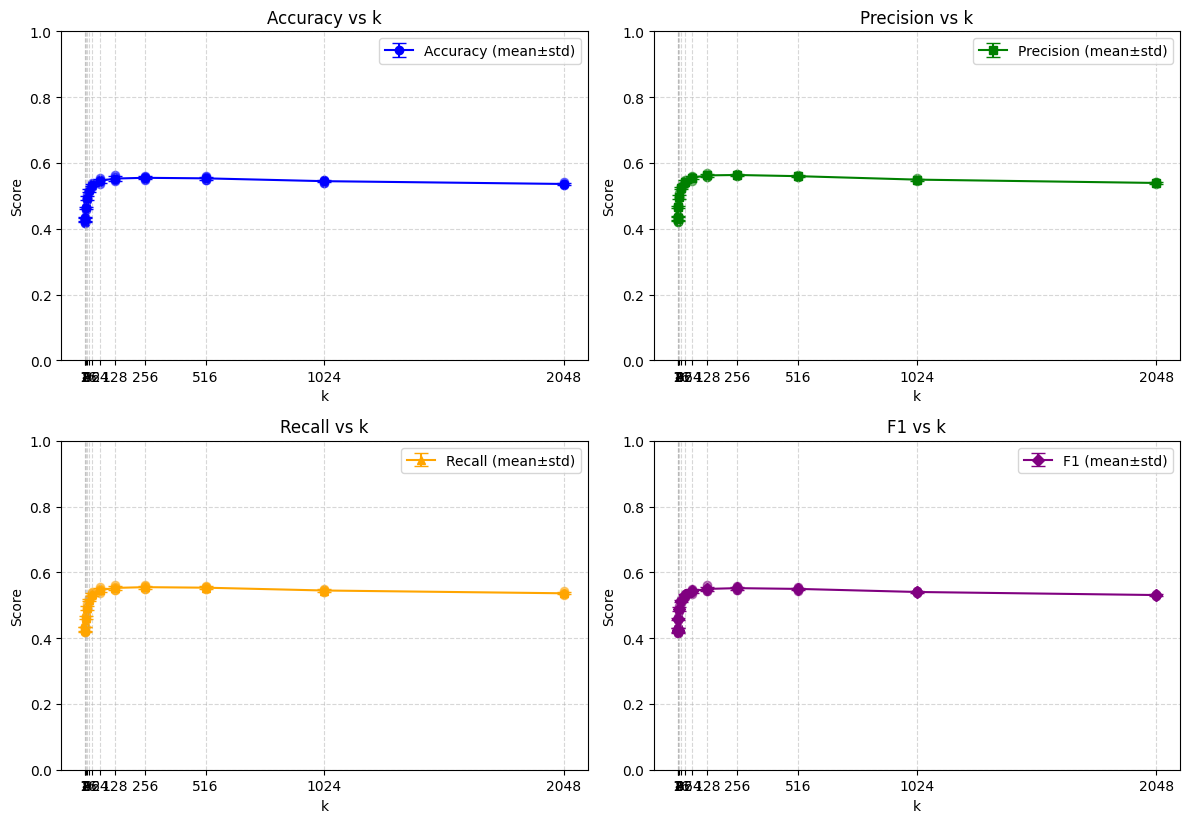

In [19]:
k_choices = k_values  # 예: [1, 3, 5, 7, 9]
metrics = ['accuracy', 'precision', 'recall', 'f1']
colors = ['blue', 'green', 'orange', 'purple']
markers = ['o', 's', '^', 'D']

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()  # 1차원 배열로 변환

for idx, (metric, color, marker) in enumerate(zip(metrics, colors, markers)):
    ax = axes[idx]

    # scatter: fold별 점
    for k in k_choices:
        values = results[k][metric]
        ax.scatter([k]*len(values), values, color=color, alpha=0.5)

    # 평균 ± 표준편차 error bar
    means = [np.mean(results[k][metric]) for k in k_choices]
    stds  = [np.std(results[k][metric]) for k in k_choices]
    ax.errorbar(k_choices, means, yerr=stds, fmt=marker+'-', color=color,
                capsize=5, label=f'{metric.capitalize()} (mean±std)')

    ax.set_title(f'{metric.capitalize()} vs k')
    ax.set_xlabel('k')
    ax.set_ylabel('Score')
    ax.set_xticks(k_choices)
    ax.set_ylim(0, 1)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend()

# 마지막 subplot 빈칸 제거
if len(metrics) < len(axes):
    for i in range(len(metrics), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [20]:
mean_results = {
    'k': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

for k in k_values:
    mean_results['k'].append(k)
    mean_results['accuracy'].append(np.mean(results[k]['accuracy']))
    mean_results['precision'].append(np.mean(results[k]['precision']))
    mean_results['recall'].append(np.mean(results[k]['recall']))
    mean_results['f1'].append(np.mean(results[k]['f1']))

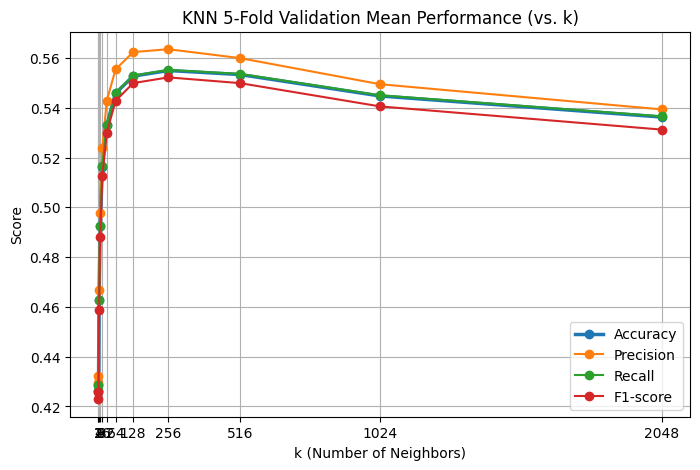

In [21]:
plt.figure(figsize=(8,5))
plt.plot(mean_results['k'], mean_results['accuracy'], marker='o', linewidth=2.5, label='Accuracy')
plt.plot(mean_results['k'], mean_results['precision'], marker='o', label='Precision')
plt.plot(mean_results['k'], mean_results['recall'], marker='o', label='Recall')
plt.plot(mean_results['k'], mean_results['f1'], marker='o', label='F1-score')

plt.title("KNN 5-Fold Validation Mean Performance (vs. k)")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Score")
plt.xticks(mean_results['k'])
plt.legend()
plt.grid(True)
plt.show()

In [26]:
best_f1_index = np.argmax(mean_results['f1'])
best_acc_index = np.argmax(mean_results['accuracy'])

best_f1_k = mean_results['k'][best_f1_index]
best_acc_k = mean_results['k'][best_acc_index]

print(f'k(best f1): {best_f1_k}, k(best acc): {best_acc_k}')

k(best f1): 256, k(best acc): 256


In [27]:
# 벡터화
x_train_flatten = x_train.reshape(len(x_train), -1)
x_test_flatten = x_test.reshape(len(x_test), -1)
y_train_flatten = y_train.reshape(-1,)
y_test_flatten = y_test.reshape(-1,)

# 표준화
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flatten)
x_test_scaled = scaler.transform(x_test_flatten)

# PCA 차원 축소
pca = PCA(n_components=350, whiten=True)  # whiten 추가 → 성능/안정성 향상
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# best k (accuracy, f1 score 기준)
best_k = 256

# best k로 train 전체(=train + validation) 다시 학습
knn_best = KNeighborsClassifier(
  n_neighbors=best_k,
  metric='cosine',
  weights='distance'
)
knn_best.fit(x_train_pca, y_train_flatten)

# test set으로 최종 평가
y_pred = knn_best.predict(x_test_pca)

acc_test = accuracy_score(y_test_flatten, y_pred)
prec_test = precision_score(y_test_flatten, y_pred, average='macro', zero_division=0)
rec_test = recall_score(y_test_flatten, y_pred, average='macro', zero_division=0)
f1_test = f1_score(y_test_flatten, y_pred, average='macro', zero_division=0)

print("Final Test Performance (using best k)")
print(f"Accuracy={acc_test:.4f}, Precision={prec_test:.4f}, Recall={rec_test:.4f}, F1={f1_test:.4f}")

Final Test Performance (using best k)
Accuracy=0.5659, Precision=0.5740, Recall=0.5659, F1=0.5624
